# Project: Stock Price Prediction
# Description: Predicting the stock market is one of the most important applications of Machine Learning in finance.Predicting the stock market has been the bane and goal of investors since its inception. Every day billions of dollars are traded on the stock exchange, and behind every dollar is an investor hoping to make a profit in one way or another.
# Entire companies rise and fall daily depending on market behaviour. If an investor is able to accurately predict market movements, he offers a tantalizing promise of wealth and influence. Today, so many people are making money staying at home trading in the stock market. It is a plus point for you if you use your experience in the stock market and your machine learning skills for the task of stock price prediction.
# Dataset: https://query1.finance.yahoo.com/v7/finance/download/INR=Xperiod1=1580035828&period2=1611658228&interval=1d&events=history&includeAdjustedClose=true
# Fields in Dataset (Stock Name: Bitcoin in GBP)
## Date : This is the index in our time series that specifies the date associated with the price.
## Open Price: The first price at which BTC was purchased on that day.
## High Price:  The highest price at which BTC was purchased that day.
## Low Price: The lowest price at which BTC was purchased that day.
## Close Price: The last price at which BTC was purchased on that day.
## Volumne: The number of total trades that day.

# We will use Linear Regression Model to predict the price and see how the Model is evaluation by measuring MAE, R squared, MSE and RMSE.


# Import the Libraries

In [136]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn import model_selection 
from sklearn.linear_model import LinearRegression

# Load the dataset into dataframe

In [137]:
df_info = pd.read_csv(r'C:\Users\kgupta\Data Science - Jupyter Notebook\BTC-GBP.csv')

In [138]:
df_info.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,3/10/2023,18330.46484,18399.70508,16955.90234,17079.11719,17079.11719,25467815509
1,3/11/2023,17082.45703,17084.26758,16391.43750,16776.56836,16776.56836,32891431901
2,3/12/2023,16777.09570,17278.15234,16676.63477,17145.09961,17145.09961,25079185688
3,3/13/2023,17141.45898,18371.42383,16992.52930,18353.96680,18353.96680,24245969315
4,3/14/2023,18347.72070,20165.61523,18169.72656,19887.22656,19887.22656,40654919503
5,3/15/2023,19890.70508,21756.46484,19811.30078,20365.50000,20365.50000,44952948358
6,3/16/2023,20385.95117,20887.69531,19940.31445,20199.99414,20199.99414,36176824956
7,3/17/2023,20197.91797,20780.91211,20066.91992,20687.96680,20687.96680,27965747139
8,3/18/2023,20689.89453,22810.54297,20617.28711,22512.30469,22512.30469,41644471530
9,3/19/2023,22532.16016,22759.76367,21873.35156,22144.02930,22144.02930,29335293435


# Checking the Null values in dataframe

In [139]:
df_info.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Check the type of the columns

In [140]:
df_info.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

# Drop the un-necessary columns from dataframe

In [141]:
df_info.drop(columns = ['Adj Close'],inplace = True)

# Check the description of data in the dataframe 

In [142]:
df_info.describe()

,Open,High,Low,Close,Volume
count,367.000000,367.000000,367.000000,367.000000,3.670000e+02
mean,26895.748117,27384.710528,26501.109817,26992.170923,1.568181e+10
std,7089.886850,7354.893598,6920.547509,7210.168466,9.490215e+09
min,16777.095700,17084.267580,16391.437500,16776.568360,4.370890e+09
25%,21958.482420,22295.600585,21684.948240,21986.031250,9.798582e+09
50%,23264.390630,23664.472660,23094.728520,23306.751950,1.298494e+10
75%,31992.222655,32955.486325,31399.831055,32552.224610,1.833329e+10
max,53855.898440,54437.863280,53191.746090,53847.511720,8.091722e+10


# Convert the datetime object to datetime type

In [143]:
df_info['Date'] = pd.to_datetime(df_info['Date'])

In [144]:
df_info.head(5)

,Date,Open,High,Low,Close,Volume
0,2023-03-10,18330.46484,18399.70508,16955.90234,17079.11719,25467815509
1,2023-03-11,17082.45703,17084.26758,16391.43750,16776.56836,32891431901
2,2023-03-12,16777.09570,17278.15234,16676.63477,17145.09961,25079185688
3,2023-03-13,17141.45898,18371.42383,16992.52930,18353.96680,24245969315
4,2023-03-14,18347.72070,20165.61523,18169.72656,19887.22656,40654919503


In [145]:
df_info_updated = df_info.copy()
df_info_updated.set_index('Date',inplace = True)

In [146]:
df_info_updated.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2023-03-10,18330.46484,18399.70508,16955.90234,17079.11719,25467815509
2023-03-11,17082.45703,17084.26758,16391.43750,16776.56836,32891431901
2023-03-12,16777.09570,17278.15234,16676.63477,17145.09961,25079185688
2023-03-13,17141.45898,18371.42383,16992.52930,18353.96680,24245969315
2023-03-14,18347.72070,20165.61523,18169.72656,19887.22656,40654919503
2023-03-15,19890.70508,21756.46484,19811.30078,20365.50000,44952948358
2023-03-16,20385.95117,20887.69531,19940.31445,20199.99414,36176824956
2023-03-17,20197.91797,20780.91211,20066.91992,20687.96680,27965747139
2023-03-18,20689.89453,22810.54297,20617.28711,22512.30469,41644471530


# Exploratory Data Analysis Process

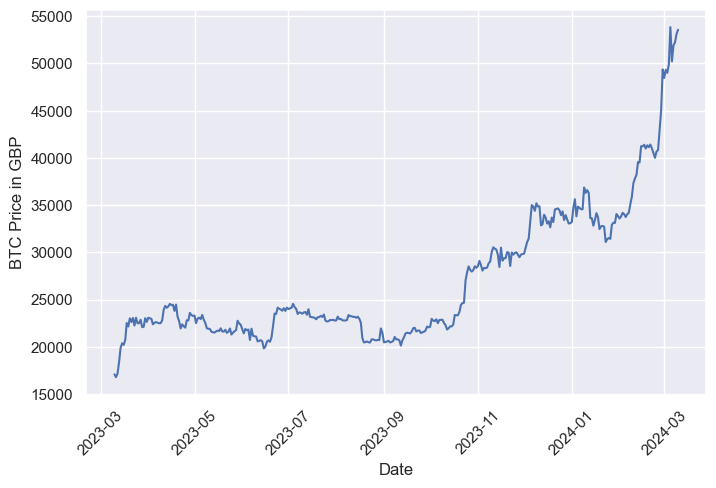

In [147]:
ax = plt.figure(figsize = (8,5))
plt.ylabel('BTC Price in GBP')
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.plot(df_info_updated.index, df_info_updated['Close'],)

# Select the X, Y features

In [148]:
X = df_info[['Open','High','Low','Volume']]
y = np.array(df_info[['Close']])

# Split the data into train and test data

In [149]:
X_train,X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.20, random_state = 42)

# Scale the data so that all columns are in same units

In [150]:
#sc = preprocessing.StandardScaler()
#X = sc.fit_transform(X)

In [151]:
X

,Open,High,Low,Volume
0,18330.46484,18399.70508,16955.90234,25467815509
1,17082.45703,17084.26758,16391.43750,32891431901
2,16777.09570,17278.15234,16676.63477,25079185688
3,17141.45898,18371.42383,16992.52930,24245969315
4,18347.72070,20165.61523,18169.72656,40654919503
...,...,...,...,...
362,53855.89844,54367.62891,46703.81641,80917222794
363,50198.76953,53187.08594,49486.60547,53981648615
364,51900.52734,53177.42188,51557.91406,36673082938
365,52241.96875,54429.58203,51493.31641,46043619963


# Build the Linear Regresion Model

In [157]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

# Predict the Model

In [158]:
y_predict = lm.predict(X_test)

# Evaluate the Model

In [159]:
print('The R-squared or regression score is: {:.3f}'.format(metrics.r2_score(y_test,y_predict)))
print('The mean absolute error is {:.3f}'.format(metrics.mean_absolute_error(y_test,y_predict)))
print('The mean squared error is {:.3f}'.format(metrics.mean_squared_error(y_test,y_predict)))
print('The root mean squared error is {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_predict))))

The R-squared or regression score is: 0.999
The mean absolute error is 178.733
The mean squared error is 74399.492
The root mean squared error is 272.763


# Create a dataframe with Actual and Predicted values

In [178]:
dfr = pd.DataFrame({'Actual_Price': y_test.flatten(),'Predicted_Price': y_predict.flatten()})
dfr.head(5)

,Actual_Price,Predicted_Price
0,21605.47266,21906.012373
1,24324.95117,24349.523085
2,22485.71289,22415.623525
3,32818.09766,33178.133306
4,23367.66406,23307.213274


# Calculate the Accuracy of the Model

In [168]:
x2 = dfr['Actual_Price'].mean()
y2 = dfr['Predicted_Price'].mean()
Accuracy1 = x2/y2*100
print("The accuracy of the model is " , Accuracy1)

The accuracy of the model is  100.0306508227877


# Scatter Plot the Actual and Predicted Price

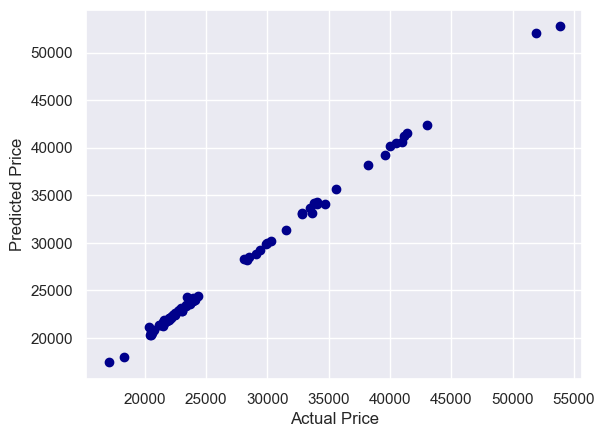

In [169]:
plt.scatter(dfr.Actual_Price, dfr.Predicted_Price,  color='Darkblue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

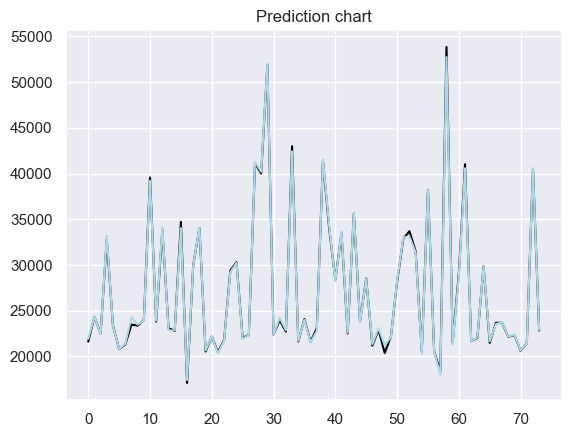

In [177]:
plt.plot(dfr.Actual_Price, color='black')
plt.plot(dfr.Predicted_Price, color='lightblue')
plt.title("Prediction chart")
plt.show()

# Conclusions: To have better visibility on where the market is going, relying on regression models and predicting certain values based on past performance is not good enough. Even though R-squareds is 99% which means Model is good at explaining the variation of Y values but higher value of MAE and RMSE showed that model is inaccurate in predicting the stock price. 